<hr>
Patrick BROCKMANN - LSCE (Climate and Environment Sciences Laboratory)<br>
<img align="left" width="40%" src="http://www.lsce.ipsl.fr/Css/img/banniere_LSCE_75.png" \><br><br>
<hr>

Updated: 2019/11/13

#### Load the ferret extension

In [1]:
%load_ext ferretmagic

#### "Classic" use with cell magic

currently SET data sets:
 1> /opt/ferret_dsets/data/monthly_navy_winds.cdf (default)
 
 name title I J K L
 UWND ZONAL WIND 1:144 1:73 ... 1:132
 M/S on grid GDN1 with -99.9 for missing data
 X=18.8E:18.8E(378.8) Y=91.2S:91.2N 
 VWND MERIDIONAL WIND 1:144 1:73 ... 1:132
 M/S on grid GDN1 with -99.9 for missing data
 X=18.8E:18.8E(378.8) Y=91.2S:91.2N 
 
 time range: 16-JAN-1982 20:00 to 17-DEC-1992 03:30


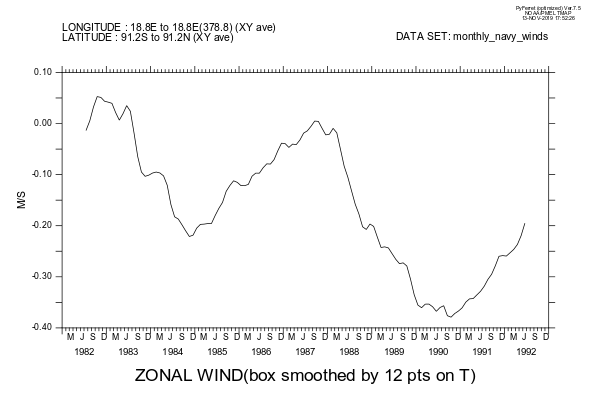

In [2]:
%%ferret -s 600,400
set text/font=arial
use monthly_navy_winds.cdf
show data/full
plot uwnd[i=@ave,j=@ave,l=@sbx:12]

#### Explore interactive widgets

In [3]:
from ipywidgets import interact

@interact(var=['uwnd','vwnd'], smooth=(1, 20), vrange=(0.5,5,0.5))
def plot(var='uwnd', smooth=5, vrange=1) :
    %ferret_run -s 600,400 'ppl color 6, 70, 70, 70; plot/grat=(dash,color=6)/vlim=-%(vrange)s:%(vrange)s %(var)s[i=@ave,j=@ave], %(var)s[i=@ave,j=@ave,l=@sbx:%(smooth)s]' % locals()


interactive(children=(Dropdown(description='var', options=('uwnd', 'vwnd'), value='uwnd'), IntSlider(value=5, …

#### Another example with a map


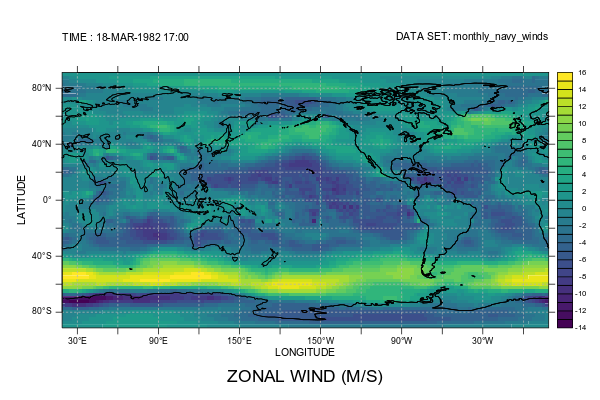

In [4]:
# The line of code to make interactive
%ferret_run -q -s 600,400 'cancel mode logo; \
                            ppl color 6, 70, 70, 70; \
                            shade/grat=(dash,color=6) %(var)s[l=%(lstep)s] ; \
                            go land' %  {'var':'uwnd','lstep':'3'}

In [5]:
import ipywidgets as widgets
from ipywidgets import interact

play = widgets.Play(
    value=1,
    min=1,
    max=10,
    step=1,
    description="Press play",
    disabled=False
)
slider = widgets.IntSlider(
    min=1,
    max=10
)
widgets.jslink((play, 'value'), (slider, 'value'))
a=widgets.HBox([play, slider])

@interact(var=['uwnd','vwnd'], lstep=slider, lstep1=play)
def plot(var='uwnd', lstep=1, lstep1=1) :
    %ferret_run -q -s 600,400 'cancel mode logo; \
                                ppl color 6, 70, 70, 70; \
                                shade/grat=(dash,color=6)/lev=(-inf)(-10,10,2)(inf)/pal=mpl_Div_PRGn.spk %(var)s[l=%(lstep)s] ; \
                                go land' %  locals()

interactive(children=(Dropdown(description='var', options=('uwnd', 'vwnd'), value='uwnd'), IntSlider(value=1, …

More informations on ipython widgets from
* https://github.com/ipython/ipywidgets